$\color{green}{\text{This notebook is best viewed in jupyter lab/notebook. You may also choose to use Google Colab but some parts of the images/colouring will not be rendered properly.}}$

# Lab 3 (Weeks 8,9): k-Means Clustering

<div class="alert alert-block alert-warning">

<b>Enter you credentials below</b>

- <b>Student Name:</b> Kelly Huang
- <b>Student ID:</b> 31477399
- <b>Date:</b> March 21, 2023
    

![unsup2.jpg](img/ML.jpg)

## Unsupervised Learning

As the name suggests, unsupervised learning is a type of machine learning in which the training of a model is not supervised using labels of the training dataset. Instead, models themselves attempt to find hidden patterns and insights from the given data. Unsupervised learning cannot be directly applied to a regression or classification problem because unlike supervised learning, we have the input data but no corresponding output data (no labels). The goal of unsupervised learning is to find the underlying structure of the dataset, group that data according to similarities, and represent the data in a compressed format.

## Clustering

Clustering is a type of unsupervised learning which involves grouping of data points. Given a set of data points, we can use a clustering algorithm to classify each data point into a specific group. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features. Some examples of popular clustering algorithms are:
- __K-Means Clustering__
- __Mean-Shift Clustering__
- Spectral Clustering
- DBSCAN
- Gaussian Mixture Models (GMM)

In this lab, we will be implementing k-means clustering and mean-shift clustering on the same dataset. 

## K-Means Clustering

K-Means Clustering is one of the simplest unsupervised machine learning algorithms. You will first decide a number *k*, which corresponds to the number of clusters that you desire to have in your dataset. This number will also correspond to the number of centroids. A centroid is the location representing the center of a cluster. Each data point in your dataset is allocated to a specific cluster following a set of rules in an iterative manner. Also, the locations of the centroids are updated subsequently by averaging the data points assigned to the respective cluster. The **‘means’** in the k-Means Clustering refers exactly to this method of updating each cluster centroid.

![kmeans_anim.gif](img/kmeans_anim.gif)

## What you should do in this lab exercise!

In this laboratory exercise, you will create a program that clusters and re-colours each pixel in a provided colour image to **k** mean colours using the k-means clustering algorithm. In all of the tasks below, you may not use any pre-written libraries for k-Means Clustering (e.g. **no** scikit-learn), instead you should use your knowledge of python and numpy to build your own code to perform k-Means Clustering. Your end result of the clustered image should look something like the one shown below.

*Note*: If you cannot see the displayed image '*objective_sharon.jpg*', have a look into the provided '*img*' folder.

![objective_sharon.jpg](img/objective_sharon.jpg)

<div class="alert alert-block alert-warning">
    
You are going to work on the following six tasks throughout this lab. <span style="color:red"> </span>

- **Task 1** : Distance Function
- **Task 2** : k-Means Clustering and visualisation
- **Task 3** : k-Means++ Initialization
- **Task 4** : GMM: Analysing Data Distributions.
- **Task 5** : Mean Shift - Data Modelling via its distribution.
- **Task 6** : Comparison between k-Means, k-Means++ Initialization and Mean-Shift.
    
</div>

In [1]:
# As always, we first import several libraries that will be helpful to solve the tasks
# Important: You are only allowed to use cv2 to import images, but you may NOT use the contained k-means functionality
# For the GMM, you will run through the steps of understanding the model, then use a library to apply it to the same image from the k-means task

import matplotlib.pyplot as plt  
from mpl_toolkits import mplot3d
import numpy as np     
import cv2
import time

from IPython.display import clear_output
from matplotlib.colors import ListedColormap

plt.style.use('dark_background')

<div class="alert alert-block alert-info">

## Task 1: Distance function
In this task, you wil build a helper function to compute the squared distance from a set of data points to a set of mean values (*aka* centroids). You are given a small dataset of five data points and two centroids for testing. Using your 'dist2c' function, you will compute distances from each centroid to every data point. Finally, you will visualize your results and check whether your distances are correct by assigning the data points to the closest centroid and displaying the results.
    
</div>

Now, write your own **dist2c** function, which takes a set of data points ('*data*') and a set of means ('*centroids*') and computes the squared distance from each mean to every data point.

In [2]:
def dist2c(data, centroids):
    # The inputs and the outputs of your function should be as follows:
    # Inputs - data         : numpy array of size N x d
    #          centroids    : numpy array of size c x d
    # Output - dist_vector  : numpy array of size c x N
    #
    # N = the number of data points, c = the number of centroids, d = dimension of data

    ### Insert your solution here ###
    c, _ = centroids.shape
    N, _ = data.shape
    squared_distance = np.zeros((c, N))
    for C in range(c):
        dist_temp = np.sum((data - centroids[C,:]) ** 2, axis = 1)
        dist_temp = np.sqrt(dist_temp) # 1xN
        squared_distance[C,:] = dist_temp
    return squared_distance

Now, let's check the function you wrote on the following provided data points.
- X contains five 3-dimensional data points

\begin{equation}
X = 
\begin{bmatrix}
0.67187976 & 0.44254368 & 0.17900127\\
0.55085456 & 0.65891464 & 0.18370379\\
0.79861987 & 0.3439561  & 0.68334744\\
0.36695437 & 0.15391793 & 0.81100023\\
0.22898267 & 0.58062367 & 0.5637733 
\end{bmatrix}
\end{equation}

- M contains two centroids
\begin{equation}
M = 
\begin{bmatrix}
0.66441854 & 0.08332493 & 0.54049661\\
0.05491067 & 0.94606233 & 0.29515262
\end{bmatrix}
\end{equation}

Use your **dist2c** function to compute the distances from each centroid to every data point. Print your results. If you wrote the function correctly, your answer should be close to:

\begin{bmatrix}
0.25977266 & 0.47150141 & 0.10634496 & 0.16664051 & 0.43745224\\
0.64767303 & 0.34083498 & 1.0663305 & 0.99096278 & 0.23600355
\end{bmatrix}

In [3]:
### Insert your solution here ###
X = np.array([[0.67187976, 0.44254368, 0.17900127],
              [0.55085456, 0.65891464, 0.18370379],
              [0.79861987, 0.3439561 , 0.68334744],
              [0.36695437, 0.15391793, 0.81100023],
              [0.22898267, 0.58062367, 0.5637733 ]])

M = np.array([[0.66441854, 0.08332493, 0.54049661],
              [0.05491067, 0.94606233, 0.29515262]])

In [4]:
XMdist = dist2c(X,M)
print(f"Distances:\n{XMdist}")

Distances:
[[0.50967898 0.6866596  0.32610575 0.40821626 0.66140172]
 [0.80478135 0.58381074 1.0326328  0.99547113 0.48580196]]


Write a code to draw a 3D scatter plot assigning each datapoint to its closest centroid using two colors.

*Hint*: Use the '*scatter3D*' function from matplotlib, and choose a different marker (or different marker size) to indicate the cluster centroids.

In [5]:
def get_closest_pts(c_row_index, c, data, dist_argmin):
    # Will return vector of coordinates from the data vector that are closest to a specified centroid
    # Inputs -    c:           centroid vector
    #             c_row_index: row index of specified centroid
    #             data:        data vector
    #             dist_argmin: argmin of data and centroid vectors
    closest_coords = np.array([[]])
    for N in range(len(dist_argmin)):
        if dist_argmin[N] == c_row_index: # if row index matches argmin list, that position in argmin list correponds to data coordinate
            corr_datacoords = np.array(data[N,:])
            closest_coords = np.append(closest_coords, corr_datacoords) # append row to the vector
    return closest_coords.reshape((-1, 3))

def plot_centroids(ax, centroids, colours, size = 50, marker_type = '*'):
    count = 0
    for i in range(len(centroids)):
        plot = ax.scatter(centroids[i,0], centroids[i,1], centroids[i,2], marker= marker_type, c=colours[count], s=size, edgecolors='black', linewidths = 0.5, alpha=1)
        count += 1
    return plot
    
def plot_datapoints(ax, data, centroids, colours, dist_argmin, size = 15, marker_type = '.'):
    count = 0
    centroid_indices = np.unique(dist_argmin) # get list of all possible indices
    for i in centroid_indices:
        closest_pts = get_closest_pts(i, centroids, data, dist_argmin)
        plot = ax.scatter(closest_pts[:,0], closest_pts[:,1], closest_pts[:,2], marker=marker_type, c=colours[count], s=size, alpha=1)
        count += 1
    return plot
        
colours = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'gray']
custom_cmap = ListedColormap(colours)


In [6]:
### Insert your solution here ###

# Retrieve the closest centroid for each point by using argmin 
dist_argmin = np.argmin(XMdist, axis=0)
print(f'Argmin: {dist_argmin}')

Argmin: [0 1 0 0 1]


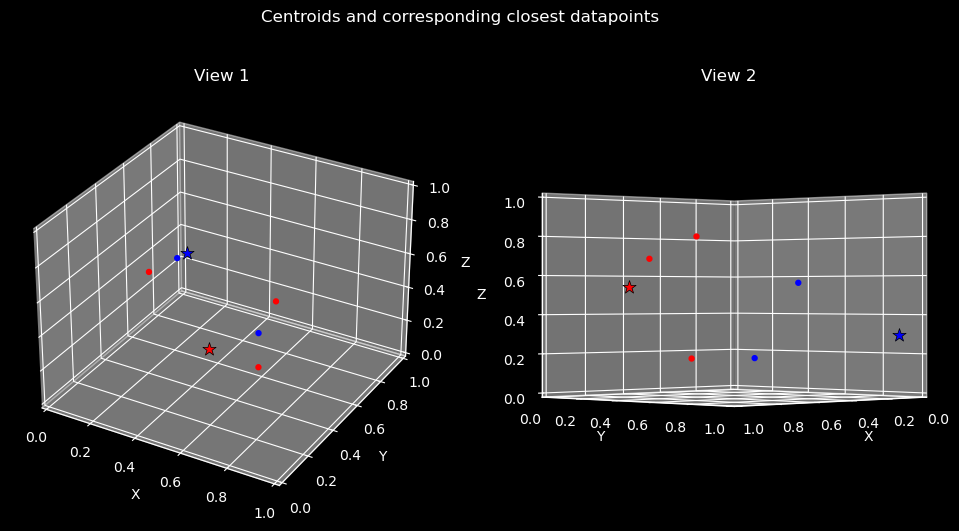

In [7]:
# Create the plot of the X and M, and display the result
fig1, (ax1, ax11) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(12, 6))

ax1.set_title('View 1')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_xlim(0, 1)  # Set x-axis limits from 0 to 6
ax1.set_ylim(0, 1)  # Set y-axis limits from 0 to 6
ax1.set_zlim(0, 1)  # Set z-axis limits from 0 to 6

plot_centroids(ax1, M, colours, 100) # Plot centroids
plot_datapoints(ax1, X, M, colours, dist_argmin, 50) # Plot datapoints

ax11.set_title('View 2')
ax11.set_xlabel('X')
ax11.set_ylabel('Y')
ax11.set_zlabel('Z')
ax11.set_xlim(0, 1)  # Set x-axis limits from 0 to 6
ax11.set_ylim(0, 1)  # Set y-axis limits from 0 to 6
ax11.set_zlim(0, 1)  # Set z-axis limits from 0 to 6

plot_centroids(ax11, M, colours, 100) # Plot centroids
plot_datapoints(ax11, X, M, colours, dist_argmin, 50) # Plot datapoints

ax11.view_init(elev=0, azim=45)

fig1.suptitle('Centroids and corresponding closest datapoints')
plt.show()

<div class="alert alert-block alert-success">
    
#### What do you observe here? Are the data points assigned to their closest centroid?
Yes, the datapoints are assigned to their closest centroid. Stars represenent centroids and dots represent datapoints.  
In View 1, it appears as if the datapoints are clustered incorrectly. However, in View 2 it can be confirmed that they are in fact assigned correctly.
</div>

<div class="alert alert-block alert-info">

## Task 2: K-means Clustering
In this task, you will implement k-Means Clustering. First, you will write a function to generate random centroids for initialization. Then you will write a function to perform k-Means Clustering (You may want to follow the steps on the lab instructions sheet). Afterwards, you will use these functions to cluster the pixels of the provided *sharon.jpg* image. Finally, you will display the results.    
    
</div>

Write a function **random_centroids**, which takes a dataset and an integer value k (= number of centroids) as inputs, and generates k number of _centroids_ which are randomly sampled from the dataset.

In [8]:
def random_centroids(data, k):
    # The inputs and the outputs of your function should be as follows:
    # Inputs - data     : numpy array (N x d)
    #        - k        : an integer value
    # Output - centroids: numpy array (k x d)
    # N = number of data points, d = dimension of data, k = number of centroids
    
    ### Insert your solution here ###
    N, _ = np.shape(data)

    if k > N:
        return "Error: k must be <= N in data (which is size Nxd)"
    
    else:
        centroids = np.array([[]]) # Centroids needs to be sampled from the original image (ie. the original data distribution)
        added_indices = np.array([[]])

        for i in range(k):
            random_row_index = np.random.randint(0, N-1) # generate random row index
            while (random_row_index in added_indices) == 1: # avoiding duplicate centroids
                random_row_index = np.random.randint(0, N-1) # generate random row index
            added_indices = np.append(added_indices,random_row_index)

            corr_row = np.array(data[random_row_index,:])
            centroids = np.append(centroids, corr_row) # append data row to the random centroids vector

        return centroids.reshape((-1, 3))

Write a function **mykMeans**, which takes a dataset, an set of k centroids and an integer value T (= number of iterations) as inputs. The function should perform k-Means Clustering on the input dataset by using the input centroids as intilization. After running for T iterations, the function should finally output a cluster index for each data point, the final set of k centroids, and the loss vector containing the k-Means loss at each iteration. (You may want to use your function **dist2c** to compute distances between centroids and data points at each iteration.)

In [9]:
def get_closest_pts_dist(c_index, dist2c, dist_argmin):
    # Will return vector of distances in a cluster that correspond to a specified centroid
    # Inputs -    c_index:     index of specified centroid
    #             dist2c:      distance vector between data and centroids
    #             dist_argmin: argmin of data and centroid vectors
    distances = np.array([[]])
    for N in range(len(dist_argmin)):
        if dist_argmin[N] == c_index: # if row index matches argmin list, that position in argmin list correponds to data coordinate
            corr_dist = np.array(dist2c[c_index,N])
            distances = np.append(distances, corr_dist) # append row to the vector
    return distances

def mykMeans(data, centroids, T):
    # The inputs and the outputs of your function should be as follows:
    # Inputs  - data        : numpy array (N x d)
    #         - centroids   : numpy array (k x d)
    #         - T           : integer
    # Outputs - cluster_idx : numpy array (N,)
    #         - centroids   : numpy array (k x d)
    #         - losses      : list (T)
    # N = number of data points, d = dimension of data, k = number of centroids, T = number of iterations

    ### Insert your solution here ###

    k = centroids.shape[0] # Number of centroids / number of clusters
    kMeans_loss = [] # Use the append() method to keep track of the loss values, this is just an empty array for now
    
    # Iterate algorithm a set amount of times
    iter = 1
    while iter <= T:
        d = dist2c(data, centroids) # Gets the distances between each point to each centroid
        cluster_idx = np.argmin(d, axis=0) # Retrieve the closest centroid for each point by using argmin 

        loss = 0 # Loss vector for that iteration
        iter_centroids = np.array([]) # New centroids for that iteration

        # Iterating through clusters to calculate loss and new centroid coordinate
        for i in range(k):
            cluster_dists = get_closest_pts_dist(i, d, cluster_idx) # Get the distances from datapoints associated with that cluster
            loss += np.sum(cluster_dists) # Calculate losses for that set of clusters

            i_datapts = get_closest_pts(i, centroids, data, cluster_idx) # Get datapoints associated with that cluster
            new_c = 1/len(cluster_dists) * np.sum(i_datapts, axis = 0) # Calculate new centroid value
            iter_centroids = np.append(iter_centroids, np.array(new_c)) # Add new centroid to vector

        # Update parameters
        centroids = iter_centroids.reshape((-1, 3)) # Update centroid vector
        kMeans_loss.append(loss) # Append losses for that iteration to total loss vector
        
        # print(f"Iteration:\n{iter}")    
        # print(f"Iteration Centroids:\n{centroids}")    
        # print(f"Iteration Losses: {loss}\n")
        
        iter += 1
    return cluster_idx, centroids, np.array(kMeans_loss)

Loading the *sharon.jpg* image and displaying it here.

(720, 1280, 3)


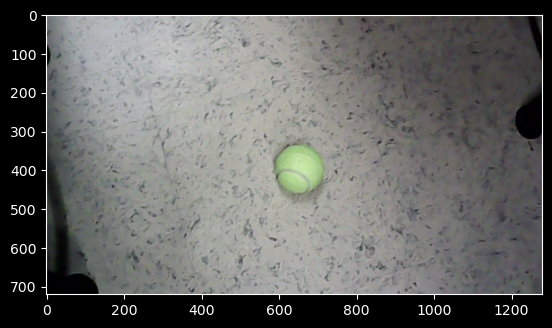

In [10]:
img = cv2.cvtColor(cv2.imread('testimg1.jpg'), cv2.COLOR_BGR2RGB)
print(img.shape)

%matplotlib inline
plt.imshow(img, aspect='equal')
plt.show()

height, width, channels = img.shape

# channels = xyz coords (columns)
# pixel = a datapoint (a row)

Now, use your **random_centroids** function to generate four random centroids. Then, use your **mykMeans** function to cluster the pixels of the *sharon.jpg* image by running it for 20 iterations (T=20). (*Hint*: You may want to reshape your image before applying the **mykMeans** function.) </br> Display the final clustered image. Each pixel should be displayed by the colour of the assigned centroid (i.e. you should only see a total of *k* colours in your clustered image).

In [ ]:
# Define a fixed random seed for repeatability
np.random.seed(17)

### Insert your solution here ###

# Function that runs myKmeans but handles an image file as input
def img_kmeans(k, T, img, c_init_func):
    # Reshape the image to a 1-dimensional vector and pass it through random_centroid
    img_flat = img.reshape((height * width, channels))
    C_init = c_init_func(img_flat, k)

    # Call mykMeans with the relevant variables
    X_idx, C_new, loss_random = mykMeans(img_flat, C_init, T)
    
    return img_flat, C_init, X_idx, C_new, loss_random

In [14]:
# Initialize centroids (k=4), perform k-means for 20 iterations and visualise the clustered colour image
k = 2
T = 2
img_flat, C_init, X_idx, C_new, loss_random = img_kmeans(k, T, img, random_centroids)
Kmeans_random_idx = X_idx

"""
C_new outputs from different random seeds:

seed = 17
[[212.22535842  34.60898297  88.74753584]
 [251.75301511 249.39430405 250.82647413]
 [230.69408279 168.6442489  128.45299452]
 [ 31.55844477  89.89066369  48.23675087]]

 seed = 3
 [[233.12515013 160.56273521 136.09896709]
 [251.76652233 250.49166441 251.18449256]
 [ 29.98514041  93.50736683  49.73151996]
 [206.07810201  28.90632663  75.55296714]]
"""

KeyboardInterrupt: 

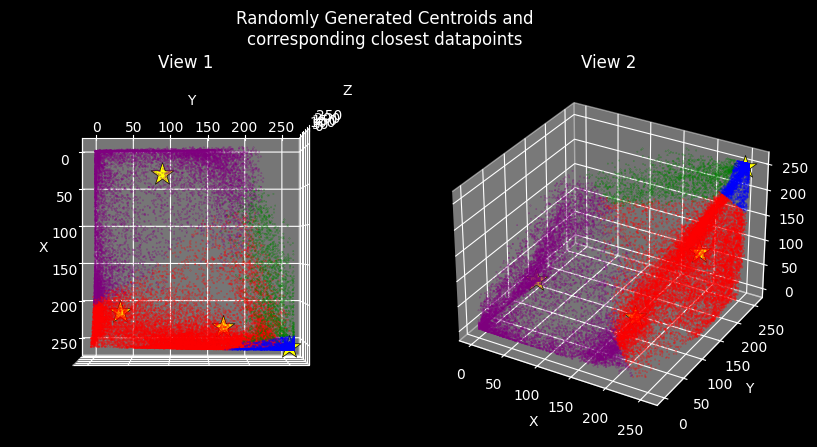

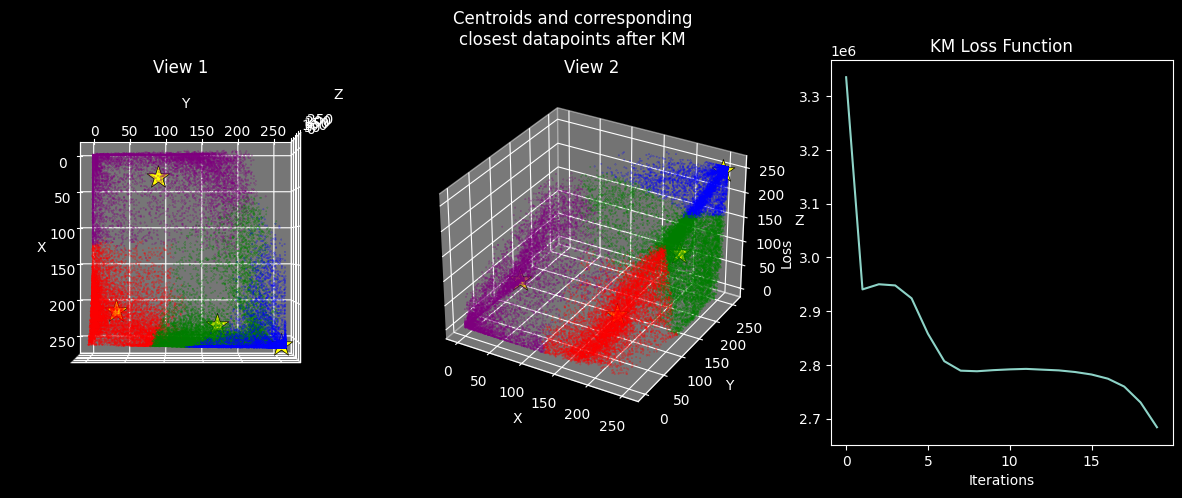

In [351]:
# Plot the result of KMeans algorithm run on sharon.jpg
k = 4
T = 20

# Plot randomly generated clusters
fig2 = plt.figure(figsize=(10, 5))
fig2.suptitle('Randomly Generated Centroids and\ncorresponding closest datapoints')

ax1 = fig2.add_subplot(1,2,1, projection='3d')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('View 1')
init_idx = np.argmin(dist2c(img_flat, C_init), axis=0) # get initial argmin
plot_datapoints(ax1, img_flat, C_init, colours, init_idx, 0.1)
plot_centroids(ax1, C_new, ["yellow"]*k, size = 300)
ax1.view_init(elev=90, azim=0)

ax2 = fig2.add_subplot(1,2,2, projection='3d')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('View 2')
init_idx = np.argmin(dist2c(img_flat, C_init), axis=0) # get initial argmin
plot_datapoints(ax2, img_flat, C_init, colours, init_idx, 0.1)
plot_centroids(ax2, C_new, ["yellow"]*k, size = 300)

# Plot clusters after KM 
fig3 = plt.figure(figsize=(15, 5))
fig3.suptitle('Centroids and corresponding\nclosest datapoints after KM')

ax2 = fig3.add_subplot(1,3,1, projection='3d')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('View 1')
plot_datapoints(ax2, img_flat, C_new, colours, Kmeans_random_idx, 0.1)
plot_centroids(ax2, C_new, ["yellow"]*k, size = 300)
ax2.view_init(elev=90, azim=0)

ax22 = fig3.add_subplot(1,3,2, projection='3d')
ax22.set_xlabel('X')
ax22.set_ylabel('Y')
ax22.set_zlabel('Z')
ax22.set_title('View 2')
plot_datapoints(ax22, img_flat, C_new, colours, Kmeans_random_idx, 0.1)
plot_centroids(ax22, C_new, ["yellow"]*k, size = 300)

ax222 = fig3.add_subplot(1,3,3)
ax222.set_xlabel('Iterations')
ax222.set_ylabel('Loss')
ax222.set_title('KM Loss Function')
ax222.plot(range(T), loss_random)

plt.show()


<div class="alert alert-block alert-success">
    
#### Have some fun with your k-Means Clustering impementation! Run the program several times with different random seeds to see if you always converge to the same solution. Try changing k from 4 to other numbers (from 2 to 10) and see how this affects the output and the repeatability of the program. Report and discuss your observations.


Different random seeds:  
The seed affects how the centroids are initialised, therefore it affects the loss function and convergence behaviour. Poorly initialised centroids will result in a higher inital loss value. For example, a random seed of 3 will cause the inital loss to be around 4.5e+6 and converge at 2.5e+6, whereas a seed of 17 will result in a higher initial loss of 6e+6 and convergence around 2.7e+6. The convergence is also slightly unstable. The final centroid values differ slightly. Ultiamtely the random seed plays a very large role in program repeatability.
  
Different k values:  
The k value will affect the nature in which the loss function converges, as well as the initial loss value. A smaller k value will result in a higher initial loss as well as converging at a higher loss. For example, at k=2, the loss converges but in an unstable manner. The initial loss value is 5e+6, and then it decreases and then increases as a spike which eventually converges. At k = 6, the initial loss value is 2.55e+6 and it has a sharp decrease and converges at 2.2e+6. Generally, the higher the k value, the better the outcome.

Now, visualize how the centroids are updated during k-Means Clustering. For that, you should write a code to plot the data points along with the centroids and display both the plot and the clustered image side-by-side. Then, use that function inside your k-Means Clustering implementation to observe how the centroids move with each iteration. 

Write your own function **visualize** which takes the dataset, cluster indices, centroids and sample indices, and generates a figure of two subplots:
1. A 3D scatter plot of the datapoints and centroids.
2. A display of the clustered image

For the 3D scatter plot, the colour of each data point should reflect the colour of the closest centroid (i.e. the centroid which it is assigned to). As it is computationally expensive to plot all the data points at each iteration, you may only draw 250 randomly selected data points (to speed things up).

In [352]:
def visualize(data, cluster_idx, centroids, sample_idx):
    # The inputs and the outputs of your function should be as follows:
    # Inputs  - data        : numpy array (N x d)
    #         - cluster_idx : numpy array (N,)
    #         - centroids   : numpy array (k x d)
    #         - sample_idx  : numpy array (250,)
    # Outputs - figure      : subplot (1, 2)
    # N = number of data points, d = dimension of data, k = number of centroids
    
    ### Insert your solution here ###

    # Obtain the data and centroid subset derived from the randomly sampled indices (sample_idx)
    sample_data = data[sample_idx]
    sampled_cluster_idx = cluster_idx[sample_idx]
    N, _ = data.shape
    k, _ = centroids.shape

    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 3, 1, projection='3d') # Create 3D scatter plot with corresponding colours as first sub-plot
    ax.set_title('New clusters')
    plot_centroids(ax, centroids, ["yellow"]*k, 300)
    plot_datapoints(ax, sample_data, centroids, colours, sampled_cluster_idx)
    ax.view_init(elev=90, azim=0)

    # Create visualization of the clustered image as second sub-plot
    # It will only contain "k" number of colours in the original image
    ax = fig.add_subplot(1, 3, 2)    
    ax.set_title('New Clustered Image')
    img_dim = int(np.sqrt(N))
    img_clustered = cluster_idx.reshape(img_dim,img_dim)
    ax.imshow(img_clustered, cmap = 'rainbow')

    ax = fig.add_subplot(1, 3, 3)   
    # Displaying original image again for reference
    ax.set_title('Original')
    plt.imshow(img, aspect='equal') 

    # Show both visiualizations, no additional code needed below this
    plt.show()

Now modify your **mykMeans** function and create a new **myKMeans_visualize** function by adding the **visualize** function that you wrote above in order to visualize the results at every iteration. 

Make sure you add a time pause of 1-2 seconds after each iteration so there is enough time for you to observe the convergence of the centroids clearly! *Hint*: the '*time*' library we imported at the beginning provides a '*sleep*' function!

In [353]:
def mykMeans_visualize(data, centroids, T):
    # The inputs and the outputs of your function should be as follows:
    # Inputs  - data        : numpy array (N x d)
    #         - centroids   : numpy array (k x d)
    #         - T           : integer, number of iterations
    # N = number of data points, d = dimension of data, k = number of centroids, T = number of iterations

    N = data.shape[0]
    k = centroids.shape[0] # Number of centroids / number of clusters
    kMeans_loss = [] # Use the append() method to keep track of the loss values, this is just an empty array for now

    sample_idx = np.random.permutation(N)[:250] # generates am array of indices from 0 to N-1, shuffles them, and then selects the first 250 indices

    # Iterate algorithm a set amount of times
    iter = 1
    while iter <= T:

        d = dist2c(data, centroids) # Gets the distances between each point to each centroid
        cluster_idx = np.argmin(d, axis=0) # Retrieve the closest centroid for each point by using argmin 

        # Visualise results at this point
        visualize(data, cluster_idx, centroids, sample_idx)
        time.sleep(1)

        loss = 0 # Loss vector for that iteration
        iter_centroids = np.array([]) # New centroids for that iteration

        # Iterating through clusters to calculate loss and new centroid coordinate
        for i in range(k):
            cluster_dists = get_closest_pts_dist(i, d, cluster_idx) # Get the distances from datapoints associated with that cluster
            loss += np.sum(cluster_dists) # Calculate losses for that set of clusters

            i_datapts = get_closest_pts(i, centroids, data, cluster_idx) # Get datapoints associated with that cluster
            new_c = 1/len(cluster_dists) * np.sum(i_datapts, axis = 0) # Calculate new centroid value
            iter_centroids = np.append(iter_centroids, np.array(new_c)) # Add new centroid to vector

        # Update parameters
        centroids = iter_centroids.reshape((-1, 3)) # Update centroid vector
        kMeans_loss.append(loss) # Append losses for that iteration to total loss vector
                
        iter += 1
    return cluster_idx, centroids, np.array(kMeans_loss)

Test your new **myKMeans_visualize** function on the *sharon.jpg* image.

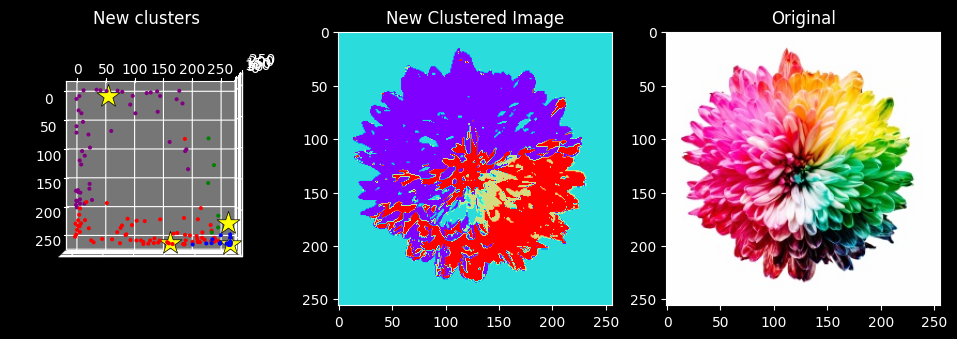

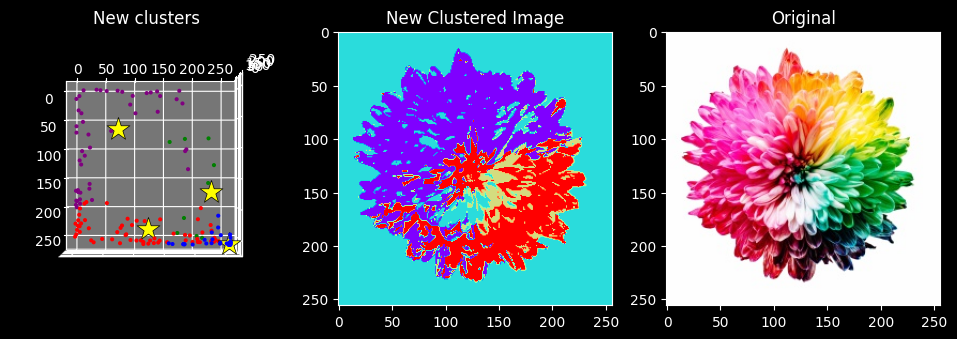

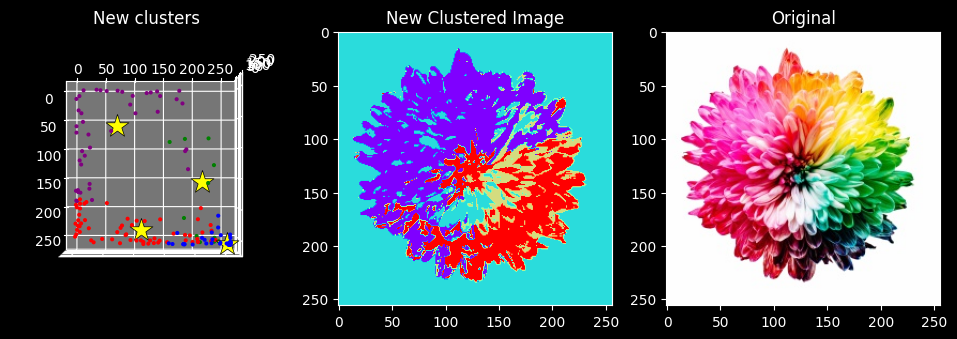

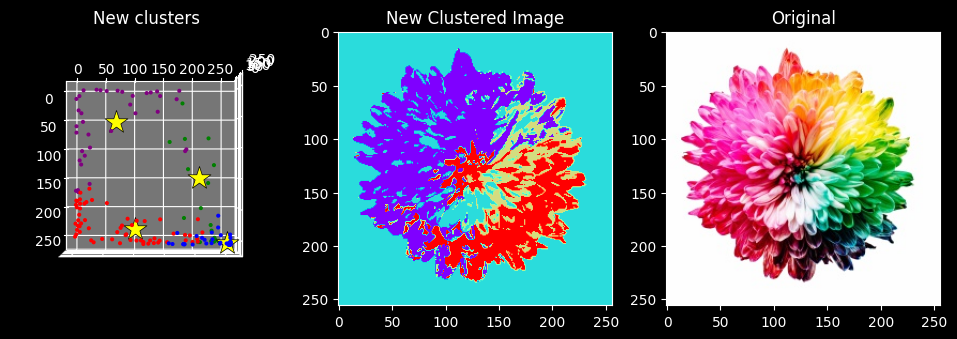

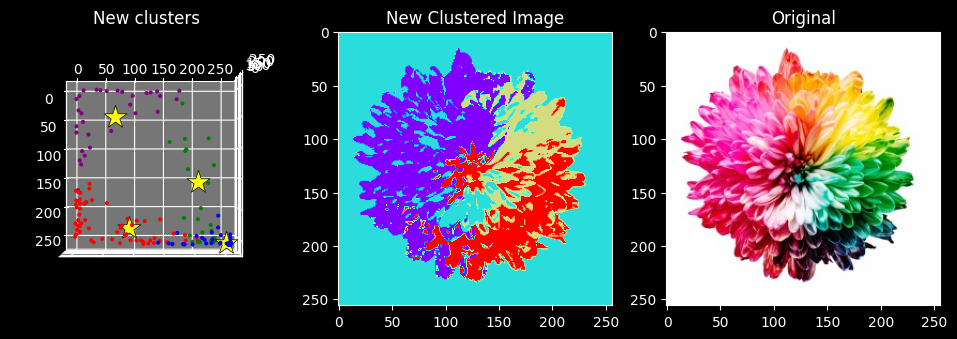

In [354]:
# Specify a random seed (will determine the random initialisation)
np.random.seed(17)

# Initialise your centroids and run your k-Means visualization function
k = 4
T = 5

C = random_centroids(img_flat, k)
KM_cluster_idx,_,_ = mykMeans_visualize(img_flat, C, T)

<div class="alert alert-block alert-success">
    
#### Observe how the centroids move with each iteration. Did you see any pattern in the movement of each centroid? Report and discuss your observations!
For centroids that get intialised close together, they tend to eventually move away from eachother until they are spread apart. I viewed the 3d plot from different angles using  
ax11.view_init(elev=0, azim=45)  
and it seems that they move away from eaachother in all planes.
</div>

<div class="alert alert-block alert-info">

## Tasks 3: k-Means++ Initialization
    
In this task, you will implement the k-Means++ initialization of the k-Means Clustering algorithm. First, you will write a function to generate centroids for the initialization using the k-Means++ initialization procedure (You may want to follow the steps on the lab instructions sheet, and read up on the method using the provided reference). 

Then you will use the generated initial centroids together with your previous k-Means Clustering implementation to cluster the pixels of the *sharon.jpg* image. Finally, you will display the results.   
    
</div>

Write a function **kmeanspp_centroids**, which takes a dataset and an integer value k (= number of centroids) as inputs, and generates k centroids following the k-Means++ initilization procedure. You might want to re-use your **dist2c** function here.

In [383]:
def kmeanspp_centroids(data,k): # This is the k-means++ initialisation
    # The inputs and the outputs of your function should be as follows:
    # Inputs - data     : numpy array (N x d)
    #        - k        : an integer value
    # Output - centroids: numpy array (k x d)
    # N = number of data points, d = dimension of data, k = number of centroids
    
    ### Insert your solution here ###

    def get_new_centroid(curr_centroid_coords):
        # Compute squared distances from all datapoints to the centroid
        D_x = dist2c(data, curr_centroid_coords) # squared distances from all datapoints to the centroid 1 x N

        # Calculate probability, 1xN array
        P = D_x/sum(D_x)

        # Find next centroid
        rand_val = np.random.rand() # generate random number between 0 and 1
        index_new_centroid = np.argmin(abs(P - rand_val)) # Whatver value is closest to 0, is the value that is closest to the rand_val

        # Get new centroid
        new_centroid = data[index_new_centroid,:]

        return new_centroid

    N, _ = np.shape(data)

    if k > N:
        return "Error: k must be <= N in data (which is size Nxd)"
    
    else:
        # Initialising vectors
        centroids_list = np.array([[]]) # Centroids needs to be sampled from the original image (ie. the original data distribution)

        # Initialise first centroid by selecting it randomly from dataset
        random_row_index = np.random.randint(0, N-1) # generate random row index
        init_centroid = np.array(data[random_row_index,:]) # get coords from dataset
        init_centroid2 = np.array([data[random_row_index,:]])
        centroids_list = np.append(centroids_list, init_centroid) # add centroid to vector
        centroid_count = 1 # keep track of number of centroids added

        # Get new centroids
        while centroid_count < k:
            new_centroid = get_new_centroid(init_centroid2)
            centroids_list = np.append(centroids_list, new_centroid) # append data row to the random centroids vector
            init_centroid2 = np.array([new_centroid]) # update old centroid
            centroid_count += 1
        
    return centroids_list.reshape((-1, 3))

Now, use your **kmeanspp_centroids** function to generate four random centroids. Then, use your **mykMeans** function to cluster the pixels of the *sharon.jpg* image. (You may want to reshape your image before applying the **mykMeans** function.) Display the final clustered image.

In [384]:
# We first specify our random seed here
np.random.seed(17)

### Insert your solution here ###
k = 4
T = 20

# Initialise the centroids with the kmeans++ method, and run the clustering
img_flat, C_init, X_idx, C_new, loss_kmeanspp = img_kmeans(k, T, img, kmeanspp_centroids)

C:\Users\kelly\AppData\Local\Temp\ipykernel_4060\3051734827.py:15: RuntimeWarning: invalid value encountered in divide
  P = D_x/sum(D_x)


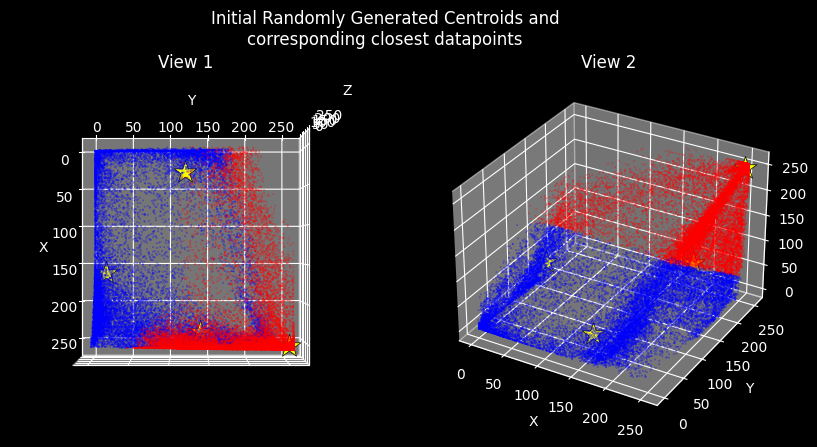

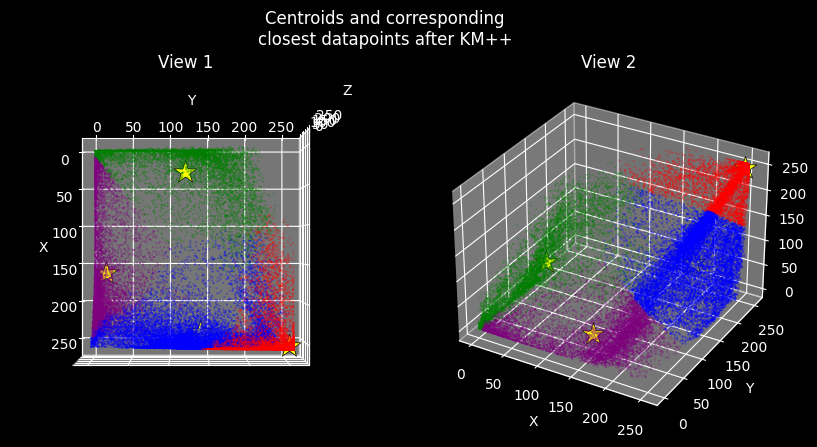

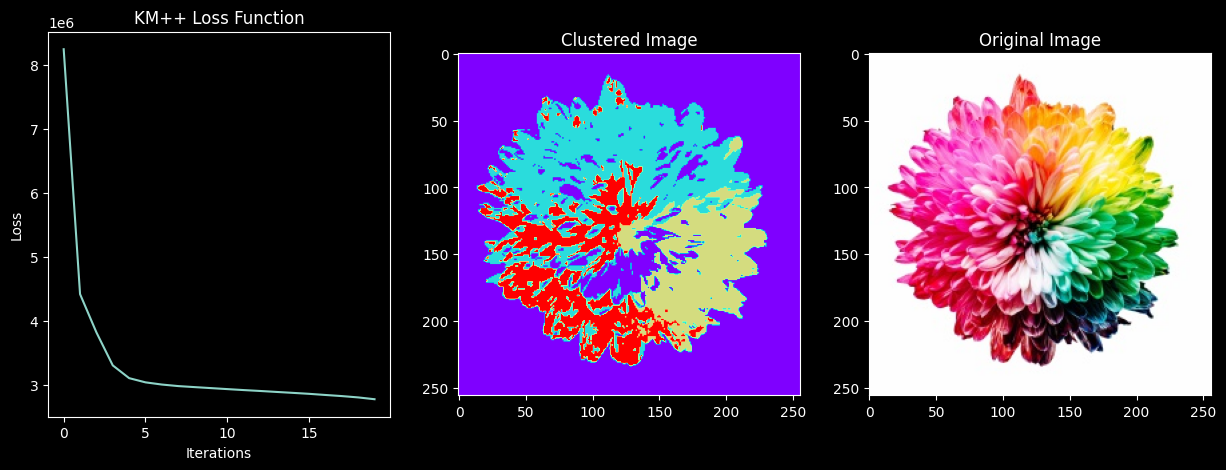

In [385]:
# Display your results (image)

# Plot the result of KMeans algorithm run on sharon.jpg
k = 4
T = 20
N,_ = img_flat.shape

# Plot randomly generated clusters
fig2 = plt.figure(figsize=(10, 5))
fig2.suptitle('Initial Randomly Generated Centroids and\ncorresponding closest datapoints')

ax1 = fig2.add_subplot(1,2,1, projection='3d')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('View 1')
init_idx = np.argmin(dist2c(img_flat, C_init), axis=0) # get initial argmin
plot_datapoints(ax1, img_flat, C_init, colours, init_idx, 0.1)
plot_centroids(ax1, C_new, ["yellow"]*k, size = 300)
ax1.view_init(elev=90, azim=0)

ax2 = fig2.add_subplot(1,2,2, projection='3d')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('View 2')
init_idx = np.argmin(dist2c(img_flat, C_init), axis=0) # get initial argmin
plot_datapoints(ax2, img_flat, C_init, colours, init_idx, 0.1)
plot_centroids(ax2, C_new, ["yellow"]*k, size = 300)

# Plot clusters after KM 
fig3 = plt.figure(figsize=(10, 5))
fig3.suptitle('Centroids and corresponding\nclosest datapoints after KM++')

ax2 = fig3.add_subplot(1,2,1, projection='3d')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('View 1')
plot_datapoints(ax2, img_flat, C_new, colours, X_idx, 0.1)
plot_centroids(ax2, C_new, ["yellow"]*k, size = 300)
ax2.view_init(elev=90, azim=0)

ax22 = fig3.add_subplot(1,2,2, projection='3d')
ax22.set_xlabel('X')
ax22.set_ylabel('Y')
ax22.set_zlabel('Z')
ax22.set_title('View 2')
plot_datapoints(ax22, img_flat, C_new, colours, X_idx, 0.1)
plot_centroids(ax22, C_new, ["yellow"]*k, size = 300)

fig4 = plt.figure(figsize=(15, 5))
ax222 = fig4.add_subplot(1,3,1)
ax222.set_xlabel('Iterations')
ax222.set_ylabel('Loss')
ax222.set_title('KM++ Loss Function')
ax222.plot(range(T), loss_kmeanspp)

ax222 = fig4.add_subplot(1, 3, 2)    
ax222.set_title('Clustered Image')
img_dim = int(np.sqrt(N))
img_clustered = X_idx.reshape(img_dim,img_dim)
ax222.imshow(img_clustered, cmap = 'rainbow')

ax222 = fig4.add_subplot(1, 3, 3)   
ax222.set_title('Original Image')
ax222.imshow(img)

plt.show()

<div class="alert alert-block alert-success">
    
#### Were you able to obtain the same results (the same clustered sharon image) as you did with the random initialization, or do they differ significantly? Were you able to obtain the results faster than with the random initialization? Report your findings, and explain why you think this happens!

The clustered image results (below) are significantly different. The colours are different, indicating that the datapoints are clustered differently. In KM++, it clusters the whites and the deep colours of the flower well and then seems to group together the pinks/yellows and blues/greens respectively. In the random initialisation, it picks up the reds and then groups together the deep colours/blues/greens and the yellows.  
Overall, the KM++ results in much better clustering - where groups of colours in the image are represented well.
    
The runtime for KM++ is longer. KM++ is slower since the probability calculations for finding centroids involve extra code compared to random initialisation, hence more computing time.
</div>

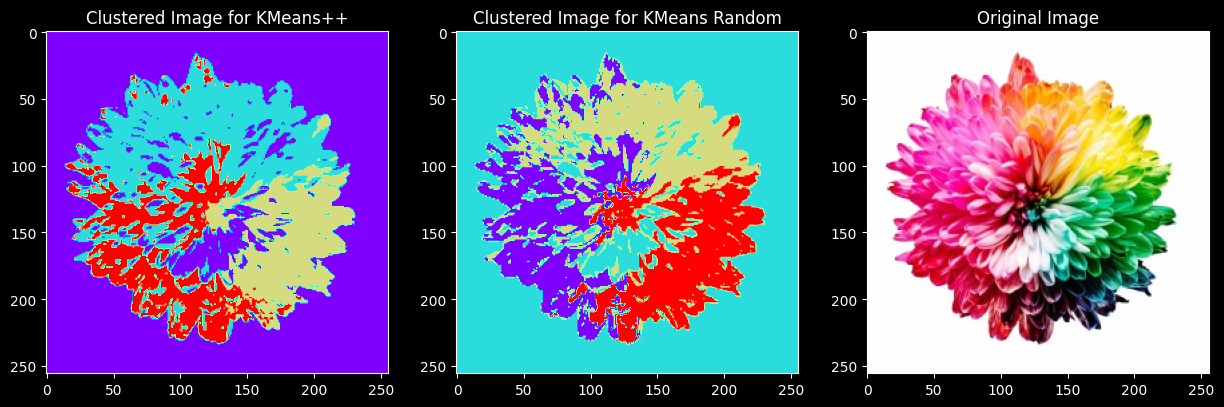

In [394]:
# Also plotting the clustered images
fig2 = plt.figure(figsize=(15, 5))
ax = fig2.add_subplot(1, 3, 1)    
ax.set_title('Clustered Image for KMeans++')
img_dim = int(np.sqrt(N))
img_clustered = X_idx.reshape(img_dim,img_dim)
ax.imshow(img_clustered, cmap = 'rainbow')
ax = fig2.add_subplot(1, 3, 2)    
ax.set_title('Clustered Image for KMeans Random')
img_dim = int(np.sqrt(N))
img_clustered = Kmeans_random_idx.reshape(img_dim,img_dim)
ax.imshow(img_clustered, cmap = 'rainbow')
ax = fig2.add_subplot(1, 3, 3)   
ax.set_title('Original Image')
ax.imshow(img)


Now, plot the loss of the two k-Means Clustering methods over the number of iterations. You may want plot the loss curves of the two methods in the same plot for convenience of comparison, and make sure to add an appropriate legend.

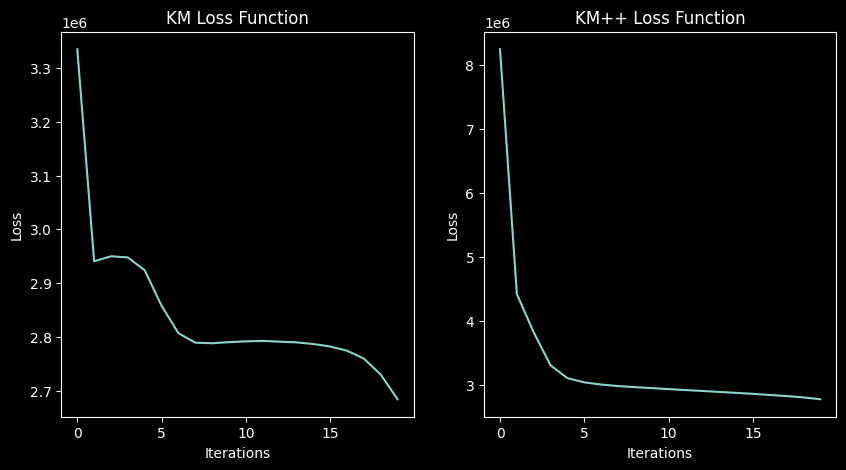

KMeans Random Final Loss: 2684161.2305215653
KMeans++ Final Loss: 2771684.125874294


In [391]:
### Insert your solution here ###

# Display your losses for the random initialization vs. the kmeans++ initialization
fig = plt.figure(figsize=(10, 5))
ax222 = fig.add_subplot(1,2,1)
ax222.set_xlabel('Iterations')
ax222.set_ylabel('Loss')
ax222.set_title('KM Loss Function')
ax222.plot(range(T), loss_random)

ax222 = fig.add_subplot(1,2,2)
ax222.set_xlabel('Iterations')
ax222.set_ylabel('Loss')
ax222.set_title('KM++ Loss Function')
ax222.plot(range(T), loss_kmeanspp)

plt.show() 

print(f'KMeans Random Final Loss: {loss_random[-1]}')
print(f'KMeans++ Final Loss: {loss_kmeanspp[-1]}')


<div class="alert alert-block alert-success">
    
    
    
#### From your results, discuss the main differences between random initialization and k-Means++ initialization. What do you notice regarding the position of the initial centroids? Which one do you think is better, and why? What do you observe regarding the loss and convergence of both methods? Discuss the pros and cons of the two methods.
The difference is how the centroids are initialised, and how the loss function converges.  
  
The initial centroids for KM++ are more spread out and did not shift as much between iterations, indicating that they were initialised in better locations compared to the random centroid initialisation. Given this, we may expect that KM++ can converge in less iterations. This can be further exemplified by the fact that the KM++ loss function converges faster, and in a more stable and predictable manner.  
  
The random centroid initialisation produces a lower initial loss value, possibly due to the fact that some centroids may be initialised in better locations out of chance. Although random initialsation results in high variablity of outputs, as well the potential for unstable convergence. However, it initialises the centroids faster as no additional calculations are needed to obtain centroids.
  
So ultimately, there is a tradeoff between speed and reliability. Random initialisation could be better for large datasets where runtime is important or where quality clusters are not as important. If the dataset is smaller, or if higher quality clustering is needed, then KM++ is ideal, despite costing more runtime. Although I suspect that KM++ is better overall as less iterations may be needed since it converges faster, therefore costing less runtime.

</div>

<div class="alert alert-block alert-info">
    
## Tasks 4: GMM: Analysing Data Distributions.
    
In this task, we will learn about how data can be modelled via its distribution. We first start with a toy example, which helps us understand the concepts.
    
    
</div>

### Think about your data like a pro!
You can think of any data sample as a random vector sampled from a distribution that is usually super complicated to model analytically. Nevertheless, there are various methods to estimate the distribution of data. 

Let us first look at an intuitive way of thinking about this. Consider a set of images of size $100 \times 100$ representing face images. You can think of any $100 \times 100$ data sample as a $10,000$D random vector sampled from a distribution that we do not know. If you have an image, where you put a mouth on the forehead, this impossible image has a very low-likelihood to be generated from the distribution that YOU DO NOT KNOW. However, a regular image from say your favorite artist has a reasonable likelihood to be generated from that distribution. 

We can think about data as a random process that provides us with new tools and algorithms to analyze it. 

### The game begins

OK, let us start with a toy example. We assume that our data can be modeled using a GMM with the following parameters:

\begin{align}
    &\mu_1 = -1, \quad \mu_2 = 0, \quad \mu_3 = 0.5, \quad \mu_4 = 2 \;.\\
    &\sigma_1 = 1.0, \quad \sigma_2 = 2.0, \quad \sigma_3 = 3.0, \quad \sigma_4 = 1.0\;.\\
    &\omega_1 = 0.6, \quad \omega_2 = 0.1, \quad \omega_3 = 0.1, \quad \omega_4 =  0.2\;.\\
\end{align}

We pretend that we do not know this is the case and will try below to estimate this distribution. But let's first take a closer look at the GMM itself.

In [395]:
### Insert your solution here (use numpy arrays to define the provided parameters) ###
means = np.array([-1, 0, 0.5, 2])
stds = np.array([1, 2, 3, 1])
weights = np.array([0.6, 0.1, 0.1, 0.2])

### Plot the pdf of a GMM

Recall that a Gaussian distribution is defined as

\begin{align}
    \mathcal{N}(\mathbf{x} | \boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp{\Big(-\frac{(x-\mu)^2}{2\sigma^2}\Big)}\;.
\end{align}

The pdf of a GMM with $k$ components is 



\begin{align}
    f({x}) &= \sum_{i=1}^k 
    \omega_i \mathcal{N}(\mathbf{x} | \boldsymbol{\mu}_i, \boldsymbol{\Sigma}_i) \;.
\end{align}

Here, ${x} \in \mathbb{R}$ (in our case) is the sample we evaluate the pdf at, $\omega_i$ is the weight (i.e., mixing coefficient) of the $i$-th Gaussian component, $\boldsymbol{\mu}_i$ is the mean vector of the $i$-th Gaussian component, and $\boldsymbol{\Sigma}_i$ is the covariance matrix of the $i$-th Gaussian component. The symbol $\mathcal{N}(\cdot|\boldsymbol{\mu}_i,\boldsymbol{\Sigma}_i)$ denotes the probability density function of a multivariate Gaussian distribution with mean vector $\boldsymbol{\mu}_i$ and covariance matrix $\boldsymbol{\Sigma}_i$. 

Now, below write a code to plot the pdf of the GMM described above between [-10,10]. If your code is correct, you should see the distribution.

Text(0.5, 1.0, 'GMM Probability Distribution of Sample')

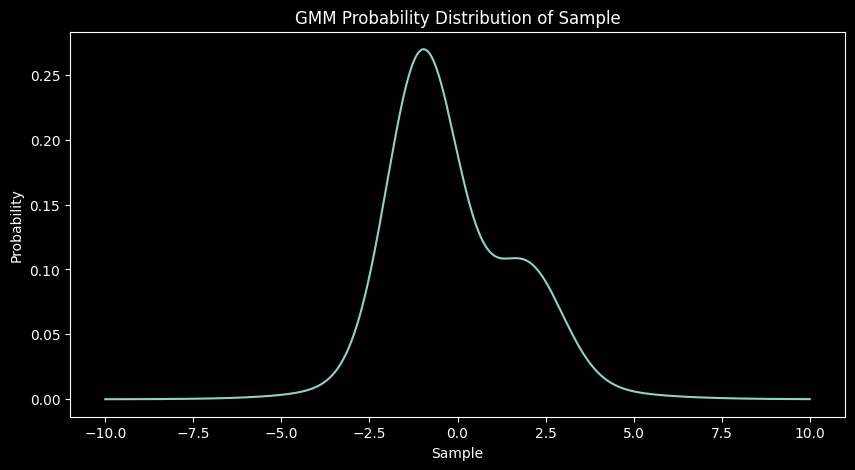

In [396]:
def normal_pdf(x , mean , sd):
    # The inputs and the outputs of your function should be as follows:
    # Inputs - x : numpy array of linearly spaced points (N x 1)
    #        - mean : an integer value
    #        - sd: an integer value
    # Output - prob_density : a numpy array of probability densities
    
    ### Insert your solution here ###    
    prob_density = 1 / np.sqrt( 2*np.pi*sd**2 ) * np.exp( -(x-mean)**2 / (2*sd**2) ) 

    return prob_density

# we know the GMM, so plot the PDF of it
# Do this by creating some points in between -10 and 10 via linspace
X_range = -10
X0 = np.linspace(-X_range, X_range, 1000).reshape(-1,1)
Z0 = np.zeros_like(X0) # Creates a tensor with identical properties as shape as X0

# Then calculate the likelihood (probabilities) of each point.
# Hint: Look at the formulas above for information how to 'compose' the overall pdf using the components of the mixture.
for i in range(means.shape[0]):
    prob_density = weights[i]* normal_pdf(X0 , means[i] , stds[i])
    Z0 += prob_density

### Insert your solution here ###
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
ax.plot(X0, Z0)
ax.set_xlabel('Sample')
ax.set_ylabel('Probability')
ax.set_title('GMM Probability Distribution of Sample')


### Next stop: Sampling from a GMM!

If we have a GMM, to draw samples from it, we can do the following:

1) First, sample from the components according to their weights using the random.choice function from the numpy package.
2) Then, sample from a normal distribution based on the chosen component and according to the parameters of the normal distribution.

Study the code below and convince yourself that what it does is to generate 1,000 samples from the GMM. 

In [506]:
num_samples = 1000

chosen_comp = np.random.choice(a=means.shape[0], size=num_samples, p=weights)

X = np.random.normal(loc=means[chosen_comp], scale=stds[chosen_comp], size=num_samples).reshape(-1,1)

print(X.shape)

(1000, 1)


### Hold on, what is a pdf?

<div class="alert alert-block alert-success">
    
#### Note that in the majority of cases we just have raw data and we do not know the pdf, so check the following figure and explain what it shows.
This figure shows that the pdf can be easily found from raw data by analysing the distribution of points, specifically the density of points within certain value ranges.
The following figure shows a set of datapoints in red, and then the associated probability distribution for those data points. It can also be done the other way around, where data points can be generated from a pdf.  

There is a higher concentration of points within the -2.5 to 2.5 region, which corresponds to a peak in the distribution. This means that if a point was to be selected at random, there is a higher chance of it being a point within the that range. Conversely, the points outside of the range -5 to 5 are more sparse and therefore there is a less likelihood of those points being selected.
</div>

_Note_: If you cannot see the displayed image 'Task4_GMM_01_what_is_a_pdf.png', have a look into the provided 'img' folder.

![Task4_GMM_01_what_is_a_pdf.png](img/Task4_GMM_01_what_is_a_pdf.png)

### Can we estimate the pdf from data? 

Yes, you can use a GMM to estimate the pdf or you can use a technique called the "Kernel Density Estimation" or KDE to estimate an arbitrary pdf. Check out the following code snippet and explain what you understand from the code below. Also, check the [KDE](https://en.wikipedia.org/wiki/Kernel_density_estimation) on wiki and learn about the algorithm (you can skip how the bandwidth can be set automatically if you want to)

<div class="alert alert-block alert-success">
    
#### Check out the following code snippet and use your newly acquired knowledge about KDE to explain what you understand from the code below. Also take a look at the plot and explain what you see.

The code is estimating the pdf a specified dataset using KDE. The kernel defines the shape of the curve used to estimate the density at each point. 'epanechnikov' specifically is a parabolic kernel. The bandwidth parameter controls the smoothness of the resulting density estimate. A smaller bandwidth is more sensitive to changes and therefore less smooth. fit(X) is training the model on the dataset that we generated in the code block above. The trained model is stored in the variable 'kde'.  
  
Next, the code generates an equally spaced amount of points with values ranging from -10 to 10, 'XO'.  
  
Then, the code evaluates X0 using the trained model kde. The score_samples method computes the log-density estimate at each point, which is log(p(x)). Thus, the output is an exponent of e in order to obtain p(x), the density values. The final vector contains the estimated density values of X0.
 
</div>

In [508]:
from sklearn.neighbors import KernelDensity

# There is no free-lunch. If you want to use a KDE, you need to identify appropriate hyper-parameters of 
# the algorithm, here a kernel and its parameters. We will use the Epanechnikov kernel with a bandwidth of 0.4. 
# Feel free to try other values.

kde = KernelDensity(kernel='epanechnikov', bandwidth=0.4).fit(X)

X0 = np.linspace(10, -10, 1000).reshape(-1,1)

Z0_kde = np.exp(kde.score_samples(X0))

_Note_: If you cannot see the displayed image 'Task4_GMM_02_kde.png', have a look into the provided 'img' folder. The kde-results are displayed in purple colour.

![Task4_GMM_02_kde.png](img/Task4_GMM_02_kde.png)

<div class="alert alert-block alert-info">
    
## Tasks 5: Mean Shift - Data Modelling via its distribution.
    
In this task, you will apply the concepts learned above for using the [mean shift algorithm](https://ieeexplore.ieee.org/document/1000236) 
 for image segmentation.
    
    
</div>

### Drumroll, here comes the Mean Shift 🐸

The [Mean Shift (MS)](https://en.wikipedia.org/wiki/Mean_shift) algorithm is a simple algorithm to find the mode of a distribution (what is the mode of a distribution? -> Make sure to look it up if you do not already know). The algorithm is iterative and employs a kernel function to find the modes from samples of a distribution. Let $k(x,z)$ be a kernel function, measuring the similarity between $x$ and $z$ (ie., the higher $k(x,z)$, the more similar are $x$ and $z$). Then using $k(x,z)$, we iterate over

\begin{align}
    m \gets \frac{ \sum_{x_i} k(x_i,m) x_i}{\sum_{x_i} k(x_i,m)} \;.
\end{align}
 
Then $m$ will be a mode of the distribution where $x_i$ are sampled from. Below, you will develop a simplified version of this algorithm using the so called _flat kernel_

\begin{align}
k_{\text{flat}}(x,z) = 
    \begin{cases}
    1 &\text{if} \;\; \|x-z\|^2 \leq h^2\\
    0 &\text{otherwise} 
    \end{cases}
\;.
\end{align}

A few comments:
1. $h$ is a hyperparameter of this kernel (we call it the bandwidth of the kernel) and you need to set it properly for the algorithm to work.
2. What this kernel does is simple, if the distance between $x$ and $z$ is less than $h$, then their similarity is considered to be 1, otherwise the similarity between $x$ and $z$ is zero.

_Note_: Make sure to re-use your code from Task 1 to compute the squared distances you need within the kernels to save some implementation time.

In [509]:
# Implement flat kernel

def flat_kernel(centers, X, bandwidth=0.1):
    
    # The inputs and the outputs of your function should be as follows:
    # Inputs - centers : the means (k x 1 numpy array), where k is the number of centres
    #        - X : samples (i x 1 numpy array), where i is the number of samples
    #        - bandwidth : an integer value representing "h" in the equation
    # Output - K : the kernel output for each distance from the means
    

    num_centers = centers.shape[0]
    num_samples = X.shape[0]

    K = np.zeros((num_samples, num_centers))
    ### Insert your solution here ###
    
    # Call dist2c function to complete part of equation (1)
    dists = dist2c(X,centers) # distance from a centre to all samples returns k * i
    # Make sure the shapes are compatible between dist and "K" and complete the remaining equation (1)
    K_temp = dists
    K_temp = K_temp-bandwidth**2 # condition
    K_temp[K_temp <= 0] = 1 # < h^2 = 1
    K_temp[K_temp != 1] = 0 # 0 otherwise
    K = K_temp.T

    return K

## Playing with the Mean Shift algorithm - your turn!

1. Write the code to perform the mean shift iterations on the data $X$ from the previous task. We will try 100 iterations for this example.
2. Using samples from the GMM, and starting from $m=5$, what will be the mode of the distribution?
3. Now start from $m=-5$. What mode do you converge to new? Do you think MS works on our toy data? 
4. Visualise the results for both cases (starting from $m=5$ and  $m=-5$) by showing the respective starting point and result after convergence plotted on top of the data $X$. </br> _Note_: Take a look at the function 'axvline' to use a vertical line for visualising the mode after convergence.

_Hint_: To increase efficiency, you can perform steps 2. and 3. in one go.

In [510]:
# provided starting points:

centers = np.array([[5],[-5]])


num_centers = centers.shape[0]

max_iter = 100 # Number of iterations for the mean shift algorithm

data = X[:,0]
centers_trajectory = []

for i in range(max_iter):

    centers_trajectory.append(centers.copy())

    # Kernel density estimation
    K = flat_kernel(centers, X, bandwidth=1)

    for j in range(num_centers): # Shift points in a specific center
        datapoints_index = K[:,j].astype(bool)
        close_data = data*datapoints_index # datapoints that are within range of that center
        close_data = close_data[close_data != 0]
        mean_close_datapts = np.sum(close_data)/len(close_data) # calculate mean of datapoints
        data[datapoints_index] = mean_close_datapts # change those datapoints to the mean value

Z_pdf = np.exp(kde.score_samples(data.reshape(-1, 1)))

centers = np.array([[-5],[5]])

num_centers = centers.shape[0]

max_iter = 100 # Number of iterations for the mean shift algorithm

data2 = X[:,0]
centers_trajectory = []

for i in range(max_iter):

    centers_trajectory.append(centers.copy())

    # Kernel density estimation
    K2 = flat_kernel(centers, X, bandwidth=1)

    for j in range(num_centers): # Shift points in a specific center
        datapoints_index = K2[:,j].astype(bool)
        close_data = data2*datapoints_index # datapoints that are within range of that center
        close_data = close_data[close_data != 0]
        mean_close_datapts = np.sum(close_data)/len(close_data) # calculate mean of datapoints
        data2[datapoints_index] = mean_close_datapts # change those datapoints to the mean value

Z_pdf2 = np.exp(kde.score_samples(data2.reshape(-1, 1)))


Plot the starting points(s), the calculated modes and the PDF. Use different colours for the two cases to better interpret the results.

Text(0.5, 1.0, 'GMM Probability Distribution')

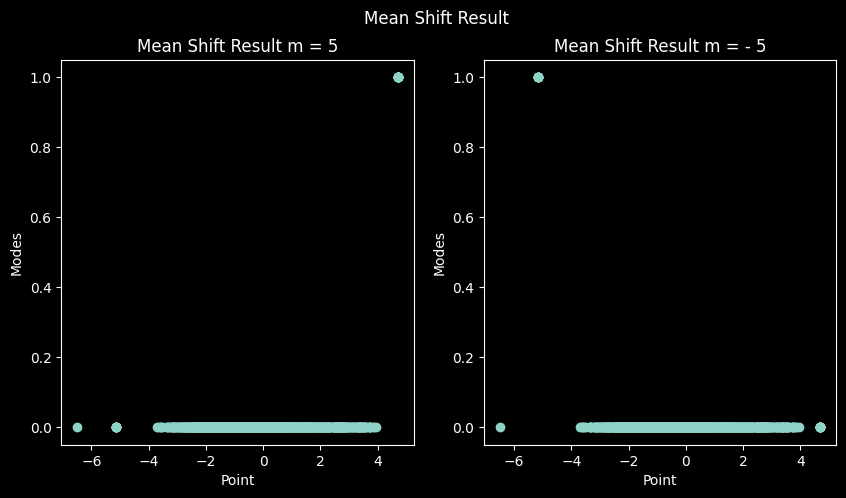

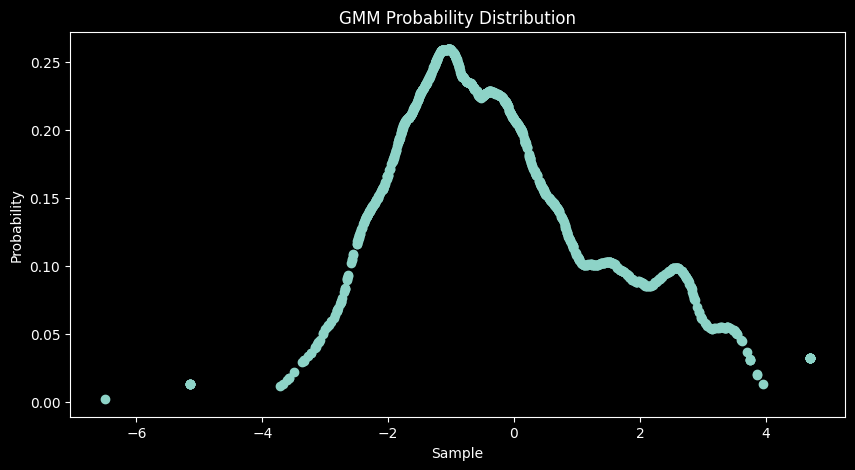

In [513]:
### Insert your solution here ###
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Mean Shift Result')

ax = fig.add_subplot(1,2,1)
ax.scatter(data, K[:,0])
ax.set_xlabel('Point')
ax.set_ylabel('Modes')
ax.set_title('Mean Shift Result m = 5')

ax = fig.add_subplot(1,2,2)
ax.scatter(data2, K2[:,0])
ax.set_xlabel('Point')
ax.set_ylabel('Modes')
ax.set_title('Mean Shift Result m = - 5')


fig2 = plt.figure(figsize=(10, 5))
ax = fig2.add_subplot()
ax.scatter(X, Z_pdf)
ax.set_xlabel('Sample')
ax.set_ylabel('Probability')
ax.set_title('GMM Probability Distribution')

## From flat kernel to Epanechnikov

The Epanechnikov kernel is a popular kernel used in the mean shift algorithm. It is defined as:

\begin{align} 
    K(x,z) = 
    \begin{cases} 
        \frac{3}{4} \Big(1 - \frac{\|x - z\|^2}{h^2} \Big) &\text{if } \|x - z\|^2 \leq h^2\;, \\ 
        0 &\text{otherwise} 
    \end{cases} 
\end{align}


The Epanechnikov kernel is a popular choice for the MS algorithm. It has a bounded support, with a flatter shape (compared to a Gaussian kernel), making it less sensitive to outliers.

- Implement the Epanechnikov kernel and repeat the above task with this kernel instead of the flat kernel:

1. Implement meanshift iterations.
2. using samples from the GMM, and starting from $m=5$, what will be mode of the distribution?
3. Now start from $m=-5$. Do you think MS works on our toy data? 

In [514]:
def epanechnikov_kernel(centers, X, bandwidth=0.1):
    
    # The inputs and the outputs of your function should be as follows:
    # Inputs - centers : the means (m x 1 numpy array), where m is the number of centres
    #        - X : samples (i x 1 numpy array), where i is the number of samples
    #        - bandwidth : an integer value representing "h" in the equation
    # Output - k : the kernel output for each distance from the means
    
    ### Insert your solution here ###

    # Again, you can use the dist2c function
    num_centers = centers.shape[0]
    num_samples = X.shape[0]

    K = np.zeros((num_samples, num_centers))
    ### Insert your solution here ###
    
    # Call dist2c function to complete part of equation (1)
    dists = dist2c(X,centers) # distance from a centre to all samples returns k * i
    # Make sure the shapes are compatible between dist and "K" and complete the remaining equation (1)
    K_temp = dists
    K_temp = K_temp-bandwidth**2 # condition
    K_temp[K_temp <= 0] = 1 # < h^2 = arg
    K_temp[K_temp != 1] = 0 # 0 otherwise
    arg = 3/4*( (1 - dists)/bandwidth**2 )
    K_temp = K_temp * arg # < h^2 = arg    
    K = K_temp.T
    
    return K

In [524]:
   
### Insert your solution here ###

max_iter = 100 # Number of iterations for the meanshift algorithm

centers = np.array([[5],[-5]])


num_centers = centers.shape[0]


data3 = X[:,0]
centers_trajectory = []

for i in range(max_iter):

    centers_trajectory.append(centers.copy())

    # Kernel density estimation
    K = epanechnikov_kernel(centers, X, bandwidth=1)

    for j in range(num_centers): # Shift points in a specific center
        datapoints_index = K[:,j].astype(bool)
        close_data = data3*datapoints_index # datapoints that are within range of that center
        close_data = close_data[close_data != 0]
        mean_close_datapts = np.sum(close_data)/len(close_data) # calculate mean of datapoints
        data3[datapoints_index] = mean_close_datapts # change those datapoints to the mean value

Z_pdf3 = np.exp(kde.score_samples(data3.reshape(-1, 1)))



centers = np.array([[-5],[5]])

num_centers = centers.shape[0]

max_iter = 100 # Number of iterations for the mean shift algorithm

data4 = X[:,0]
centers_trajectory = []

for i in range(max_iter):

    centers_trajectory.append(centers.copy())

    # Kernel density estimation
    K2 = epanechnikov_kernel(centers, X, bandwidth=1)

    for j in range(num_centers): # Shift points in a specific center
        datapoints_index = K2[:,j].astype(bool)
        close_data = data2*datapoints_index # datapoints that are within range of that center
        close_data = close_data[close_data != 0]
        mean_close_datapts = np.sum(close_data)/len(close_data) # calculate mean of datapoints
        data4[datapoints_index] = mean_close_datapts # change those datapoints to the mean value

Z_pdf4 = np.exp(kde.score_samples(data4.reshape(-1, 1)))

Plot the starting points(s), the calculated modes and the PDF. Use different colours for the two cases to better interpret the results.

Text(0.5, 1.0, 'GMM Probability Distribution')

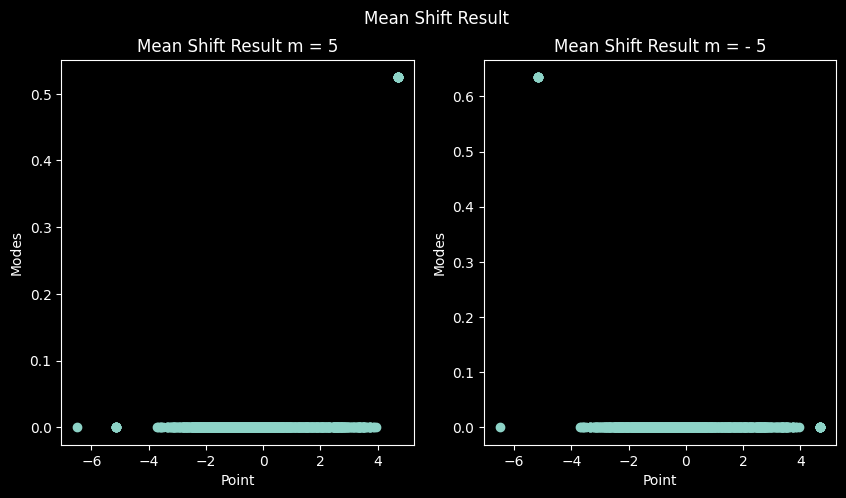

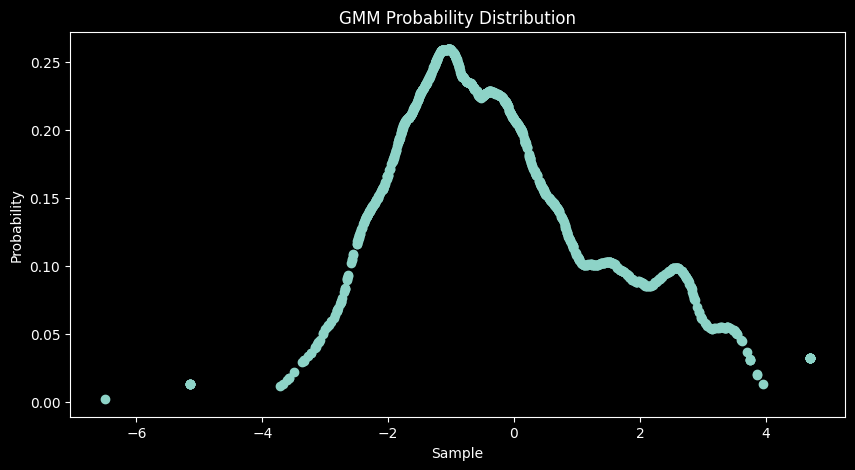

In [525]:
### Insert your solution here ###
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Mean Shift Result')

ax = fig.add_subplot(1,2,1)
ax.scatter(data3, K[:,0])
ax.set_xlabel('Point')
ax.set_ylabel('Modes')
ax.set_title('Mean Shift Result m = 5')

ax = fig.add_subplot(1,2,2)
ax.scatter(data4, K2[:,0])
ax.set_xlabel('Point')
ax.set_ylabel('Modes')
ax.set_title('Mean Shift Result m = - 5')


fig2 = plt.figure(figsize=(10, 5))
ax = fig2.add_subplot()
ax.scatter(X, Z_pdf3)
ax.set_xlabel('Sample')
ax.set_ylabel('Probability')
ax.set_title('GMM Probability Distribution')

### Apply Mean-Shift to Segment an Image

Now, we can use the MS algorithm to segment an image. To do this, we will use the implementation of the [sklearn package](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html) (you will soon see why). Here is what we will do:

1. Given the sharon image, we first apply k-means on pixel colors in two different spaces, RGB and LAB (use opencv for the color conversion). Since we have no idea how many clusters might be in the image, pick a guess (maybe counting the number of 'dominant' colors you can see)

2. Use the MS algorithm and tune its hyperparameters to achieve a reasonable result. 

3. How many colors does MS find in your image? If you fancy, repeat this with an image of your own choice and discuss the result.


In [526]:
from sklearn.cluster import MeanShift
from sklearn import cluster 

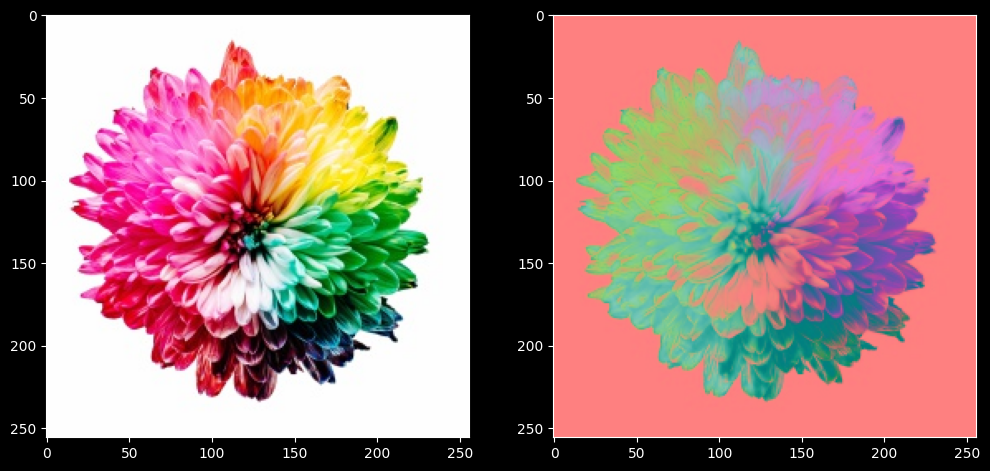

In [527]:
# Load the image and convert it to both RGB and LAB colour space; Visualise your results!
img = cv2.imread('sharon.jpg') # sharon


## Convert to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
## Convert to LAB
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

## Visualise the results


fig, axs = plt.subplots(1,2,figsize=(12,8))
axs[0].imshow(img_rgb, aspect='equal')
axs[1].imshow(img_lab, aspect='equal')

plt.show()


In [539]:

# Run the k-means clustering algorithm from the 'cluster' package of 'sklearn' (imported above) on both images and visualise your results
img_rgb_flat = np.reshape(img_rgb, (-1,3)).astype(float)/255.0
img_lab_flat = np.reshape(img_lab, (-1,3)).astype(float)/255.0

n_clusters = 4

### Insert your solution here ###
#Fit RGB model 
kmeans_model_rgb = cluster.KMeans(n_clusters=n_clusters, verbose=0)
kmeans_model_rgb.fit(img_rgb_flat)


#Fit LAB model
kmeans_model_lab = cluster.KMeans(n_clusters=n_clusters, verbose=1)
kmeans_model_lab.fit(img_lab_flat)


c:\Users\kelly\anaconda3\envs\WS1_2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 1525.7531718569753.
Iteration 1, inertia 1245.5752797997857.
Iteration 2, inertia 1163.9387267514976.
Iteration 3, inertia 1094.9900364430293.
Iteration 4, inertia 1048.7766519926026.
Iteration 5, inertia 1023.8404548436492.
Iteration 6, inertia 1012.3293468793868.
Iteration 7, inertia 1008.1382002358613.
Iteration 8, inertia 1007.0634124915146.
Iteration 9, inertia 1006.8406439846776.
Iteration 10, inertia 1006.792918131657.
Converged at iteration 10: center shift 5.135015306401467e-07 within tolerance 3.0670917605463134e-06.
Initialization complete
Iteration 0, inertia 1315.9742714340202.
Iteration 1, inertia 1072.416113203256.
Iteration 2, inertia 1046.7284291751178.
Iteration 3, inertia 1023.9141443500057.
Iteration 4, inertia 1011.9141134913167.
Iteration 5, inertia 1008.1567280998362.
Iteration 6, inertia 1007.2057754081654.
Iteration 7, inertia 1006.8999056151129.
Iteration 8, inertia 1006.8102760929328.
Converged at iteration 8: cent

c:\Users\kelly\anaconda3\envs\WS1_2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, verbose=1)

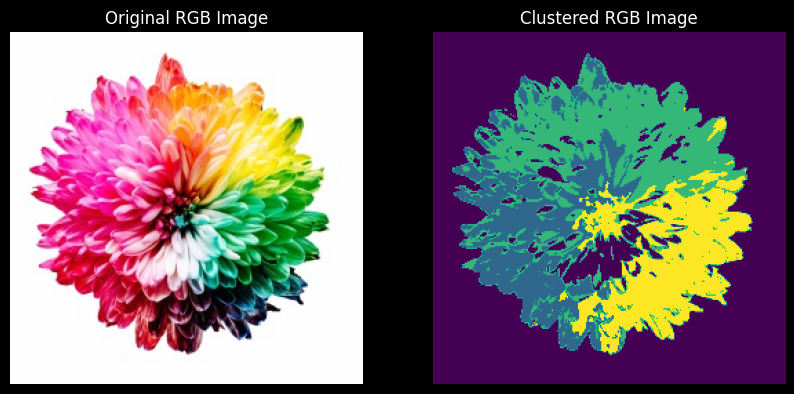

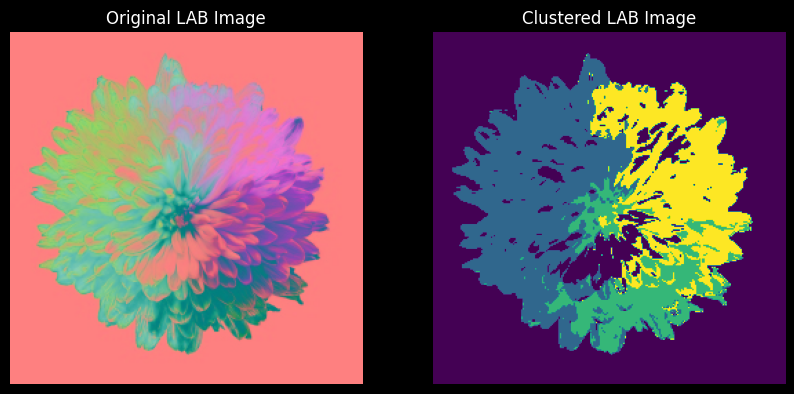

In [542]:
#Apply necessary conversions and plot it
# Get the cluster labels
labels_rgb = kmeans_model_rgb.labels_
labels_lab = kmeans_model_lab.labels_

# Reshape labels back to the original image shape
labels_rgb_reshaped = labels_rgb.reshape(img_rgb.shape[:2])
labels_lab_reshaped = labels_lab.reshape(img_lab.shape[:2])

# Plot original and clustered images
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1,2,1)
ax.imshow(img_rgb)
ax.set_title("Original RGB Image")
ax.axis('off')

ax = fig.add_subplot(1,2,2)
ax.imshow(labels_rgb_reshaped)
ax.set_title("Clustered RGB Image")
ax.axis('off')

fig2 = plt.figure(figsize=(10, 5))

ax = fig2.add_subplot(1,2,1)
ax.imshow(img_lab)
ax.set_title("Original LAB Image")
ax.axis('off')

ax = fig2.add_subplot(1,2,2)
ax.imshow(labels_lab_reshaped)
ax.set_title("Clustered LAB Image")
ax.axis('off')

plt.show()

### Now, let's do Mean-Shift Clustering

Note that to speed up the process, we suggest you randomly select around 500 datapoints from the image and fit the model using this subset of datapoints. </br> You can then 'predict' the corresponding cluster centers (labels) for all other datapoints using this fitted MeanShift model. Remember you can look at the sklearn documentation for more information about the MeanShift() module </br>

In [ ]:
# MeanShift Clustering for RGB and LAB image

# We are setting a fixed seed here
np.random.seed(17)

num_rand_samples = 500 # Number of random samlpes -- Feel free to tune this if needed

rnd_idx = np.random.choice(h*w,num_rand_samples)  # <-- Can be used to 'select' the datapoints from the (flattened) image via indexing

### Insert your solution here ###

#RGB model 
MS_model_rgb = MeanShift()
MS_model_rgb.fit(img_rgb_flat[rnd_idx])

#Lab model
MS_model_lab = MeanShift()
MS_model_lab.fit(img_lab_flat[rnd_idx])

#Apply necessary conversions and plot it


### Visualise them all!

Visualise all four resulting clustered images: k-Means RGB & LAB, as well as mean shift RGB & LAB. </br> _Hint_: Make sure to display all results in the RGB space (and convert appropriately).

In [ ]:
# Visualising all cluster results

### Insert your solution here ###

<div class="alert alert-block alert-success">
    
    
    
#### What do you notice about the mean-shift algorithm compared to the k-means for the RGB and LAB images?
    
Write your answer here

</div>

<div class="alert alert-block alert-info">
    
## Tasks 6: Comparison between k-Means, k-Means++ Initialization and Mean-Shift algorithm.
    
In this task, you will visualize the effects of random initialization, k-Means++ initialization and the Mean Shift algorithm by plotting the final clustering result of all data points together with their **final** cluster centers (using 3D scatter plots, similar to Task 2). </br> For the two k-means methods, additionally plot their **initial** centroids!
    
    
</div>

In [ ]:
# We are setting a fixed seed here
np.random.seed(17)

#### Use random initialization to cluster the pixels of the *sharon.jpg* image.

In [ ]:
### Insert your solution here ###

# Randomly initialize the centroids and obtain the clustering results -- you can choose T=20 iterations to start with
C_random = random_centroids(...)
X_idx_random, C_new_random, _ = mykMeans(...)


#### Use k-Means++ initialization to cluster the pixels of the *sharon.jpg* image. 

In [ ]:
### Insert your solution here ###

# Initialize the centroids via k-Means++ and obtain the clustering results -- you can choose T=20 iterations to start with
C_kmeanspp = kmeanspp_centroids(...)
X_idx_kmeanspp, C_new_kmeanspp, _ = mykMeans(...)

#### Use Mean Shift to cluster the pixels of the *sharon.jpg* image. 

In [ ]:
### Insert your solution here ###

# Apply the mean-shift algorithm to cluster the pixels of the sharon.jpg image
num_rand_samples = 500

rnd_idx = np.random.choice(h*w,num_rand_samples)

# Fit ms model to subset to find clusters 
MS_kmeans = MeanShift()
MS_kmeans.fit(X[rnd_idx])

# Get clusters and labels (see what MeanShift returns for its methods/attributes)
...

Plot the generated centroids from each initialization method together with the final clustering result of the data points (by using corresponding centroid colours). You may want generate a side-by-side plot for easier comparison of the three methods (e.g. via subplots). Also make sure to clearly label your methods as well as axes in the plot.

In [ ]:
# ### Insert your solution here ###

# # Create (sub)plot to display the final centroids and final cluster results obtained with Random Initialization, as well as the initial centroids
# ...


# # Create (sub)plot to display the final centroids and final cluster results obtained with k-Means++ Initialization, as well as the initial centroids
# ...

# # Create (sub)plot to display the final centroids and final cluster results obtained with the Mean Shift Algorithm
# ...

# # Display the results
# ...  

<div class="alert alert-block alert-success">
    
    
    
#### What do you notice about the mean-shift clustering compared to the k-means algorithms? And how do the two k-means initializations differ?
    
Write your answer here

</div>

Also observe the location of the initial centroids of random initialization and the K-means++ method!